Links to Exchange Rate data: https://data.worldbank.org/indicator/PA.NUS.FCRF

Link to other Economic data: https://data-explorer.oecd.org/

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Excel file
AverageWage = pd.read_excel(r'/work/Matts/Average income/Average Income.xlsx', sheet_name="Table")

In [3]:
# Removing junk rows and columns, transposing and setting correct index and columns
AverageWage.drop(AverageWage.columns[1:4], axis=1, inplace=True)
AverageWage.drop(AverageWage.index[0], axis=0, inplace=True)
AverageWage = AverageWage.set_index("Time period").T

In [4]:
# Remove duplicate columns
mask = ~AverageWage.columns.duplicated(keep='last')
AverageWage = AverageWage.loc[:, mask]

In [5]:
# Loading the USD PPP data
AverageWageUSDPPP = pd.read_excel(r'/work/Matts/Average income/Average Income USD PPP.xlsx', sheet_name="Table")

In [6]:
#Removing junk rows and columns, transposing and setting correct index and columns

AverageWageUSDPPP.drop(AverageWageUSDPPP.columns[1:4], axis=1, inplace=True)
AverageWageUSDPPP.drop(AverageWageUSDPPP.index[0], axis=0, inplace=True)
AverageWageUSDPPP = AverageWageUSDPPP.set_index("Time period").T
mask = ~AverageWageUSDPPP.columns.duplicated(keep='last')
AverageWageUSDPPP = AverageWageUSDPPP.loc[:, mask]
AverageWageUSDPPP_perc_change = AverageWageUSDPPP.pct_change() * 100
AverageWageUSDPPP_perc_change.head()

Time period,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States,OECD
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,2.042437,2.014635,3.206590,1.459825,NaN,NaN,3.187441,NaN,3.369447,0.000000,...,NaN,NaN,NaN,3.695449,3.133547,0.859544,NaN,1.997314,2.317715,1.970001
1993,0.935372,0.815328,2.101844,-0.216604,NaN,NaN,7.212493,NaN,1.106648,0.000000,...,NaN,NaN,NaN,1.597380,-1.310256,1.087337,NaN,1.630129,-0.563455,0.185831
1994,0.676477,1.007531,1.940161,-1.136505,NaN,NaN,4.032503,NaN,-3.477045,0.000000,...,NaN,NaN,NaN,1.044336,2.454616,1.236656,NaN,1.767815,-0.382271,0.288509
1995,-0.358384,0.805613,-0.340244,-0.223809,NaN,NaN,-1.341088,NaN,2.136004,6.509167,...,NaN,7.703028,NaN,-1.984378,0.249523,0.066735,NaN,0.024519,0.566931,0.224621


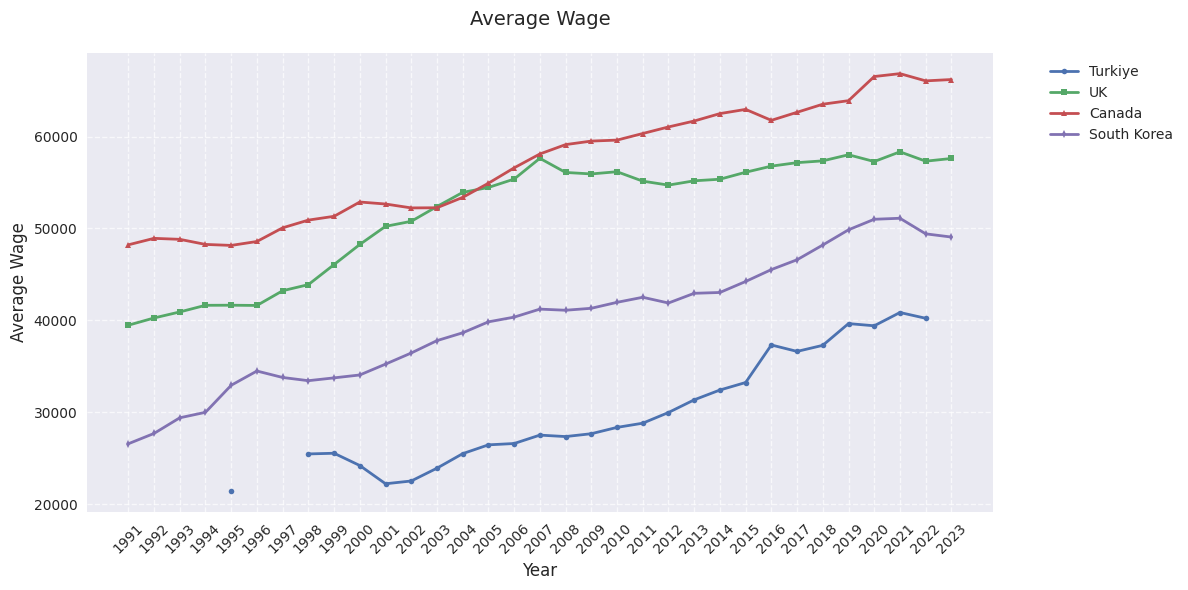

In [7]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(AverageWageUSDPPP.index, AverageWageUSDPPP['Türkiye'], linewidth=2, label='Turkiye', marker='o', markersize=4)
plt.plot(AverageWageUSDPPP.index, AverageWageUSDPPP['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(AverageWageUSDPPP.index, AverageWageUSDPPP['Canada'], linewidth=2, label='Canada', marker='^', markersize=4)
plt.plot(AverageWageUSDPPP.index, AverageWageUSDPPP['Korea'], linewidth=2, label='South Korea', marker='d', markersize=4)

# Customize the plot
plt.title('Average Wage', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Wage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
#The Corp income tax similar to personal income tax is more usable from the OECD website as an Excel sheet. This time only 1 is needed

CorpIncomeTax = pd.read_excel(r'/work/Matts/Tax/Corporate income tax.xlsx', sheet_name="Table")

In [9]:
#Removing junk rows and columns, transposing and setting correct index and columns

CorpIncomeTax.drop(CorpIncomeTax.columns[0], axis=1, inplace=True)
CorpIncomeTax.drop(CorpIncomeTax.index[0], axis=0, inplace=True)

In [10]:
CorpIncomeTax.set_index(CorpIncomeTax.columns[0], inplace=True)

In [11]:
CorpIncomeTax.columns = CorpIncomeTax.iloc[0]  # Set column names to first row
CorpIncomeTax.drop(CorpIncomeTax.index[0], inplace=True)  # Remove the first row

In [12]:
#Dropping more junk rows

CorpIncomeTax.drop(CorpIncomeTax.columns[0], axis=1, inplace=True)
CorpIncomeTax.drop(CorpIncomeTax.index[0], axis=0, inplace=True)

In [13]:
CorpIncomeTax = CorpIncomeTax.transpose()

In [14]:
#Standardising the Year (index) names to match with other dataframes as they translated weirdly
CorpIncomeTax.index = CorpIncomeTax.index.astype(int)

#For Corporate Income Tax there is no data until 1990 so this is removed
CorpIncomeTax.drop(CorpIncomeTax.index[0:15], axis=0, inplace=True)

In [15]:
#Narrowing dataset down
CorpIncomeTax = CorpIncomeTax.iloc[:, 1:39]

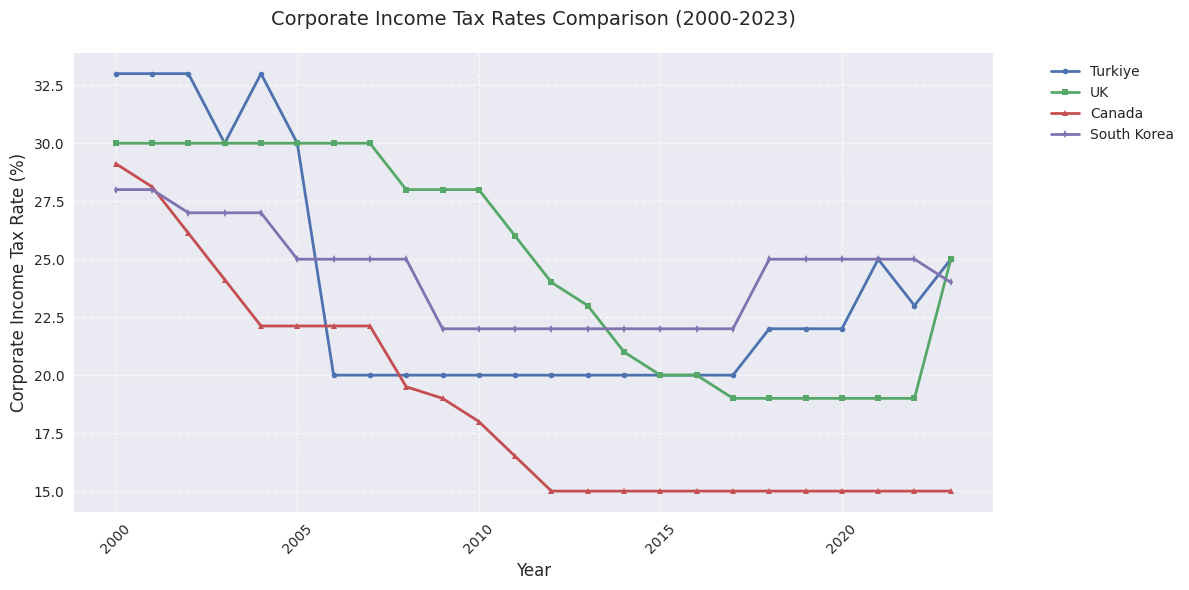

In [16]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(CorpIncomeTax.index, CorpIncomeTax['Türkiye'], linewidth=2, label='Turkiye', marker='o', markersize=4)
plt.plot(CorpIncomeTax.index, CorpIncomeTax['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(CorpIncomeTax.index, CorpIncomeTax['Canada'], linewidth=2, label='Canada', marker='^', markersize=4)
plt.plot(CorpIncomeTax.index, CorpIncomeTax['Korea'], linewidth=2, label='South Korea', marker='d', markersize=4)

# Customize the plot
plt.title('Corporate Income Tax Rates Comparison (2000-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Corporate Income Tax Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Creating a % change dataframe
CorpIncomeTax_perc_change = CorpIncomeTax.pct_change() * 100
CorpIncomeTax_perc_change.head()

Table II.1. Statutory corporate income tax rate,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,-11.764706,0.0,0.000000,-3.434066,0.000000,0.000000,0.0,0.000000,-6.25,0.0,...,-6.666667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2002,0.000000,0.0,0.000000,-7.112376,6.666667,0.000000,0.0,0.000000,0.00,0.0,...,0.000000,-6.250000,-13.793103,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2003,0.000000,0.0,-15.384615,-7.656968,3.125000,5.000000,0.0,0.000000,0.00,0.0,...,-3.571429,0.000000,0.000000,0.0,0.0,0.0,0.0,-9.090909,0.0,0.0
2004,0.000000,0.0,0.000000,-8.291874,3.030303,4.761905,0.0,-9.677419,0.00,0.0,...,-29.629630,-16.666667,-24.000000,0.0,0.0,0.0,0.0,10.000000,0.0,0.0


In [18]:
for i in range(1990, 2000):
    CorpIncomeTax.loc[i] = [np.nan] * len(CorpIncomeTax.columns)

In [19]:
for i in range(1990, 2000):
    CorpIncomeTax_perc_change.loc[i] = [np.nan] * len(CorpIncomeTax_perc_change.columns)

In [20]:
CurrencyPerDollar = pd.read_excel(r"/work/Matts/Exchange Rates/LCperUSD.xlsx", sheet_name="Table")

In [21]:
#Removing junk rows and columns, transposing and setting correct index and columns

CurrencyPerDollar.set_index(CurrencyPerDollar.columns[0], inplace=True)


In [22]:
CurrencyPerDollar = CurrencyPerDollar.transpose()
CurrencyPerDollar.drop(CurrencyPerDollar.columns[0], axis=1, inplace=True)

In [23]:
#Standardising the Year (index) and Country (Columns) names to match with other dataframes as they translated weirdly

# Clean column names
def remove_parentheses(text):
    return text.split(')')[-1].strip()

# Rename columns
CurrencyPerDollar.columns = [remove_parentheses(col) for col in CurrencyPerDollar.columns]

# Clean index 
CurrencyPerDollar.index = CurrencyPerDollar.index.str.split().str[-1]

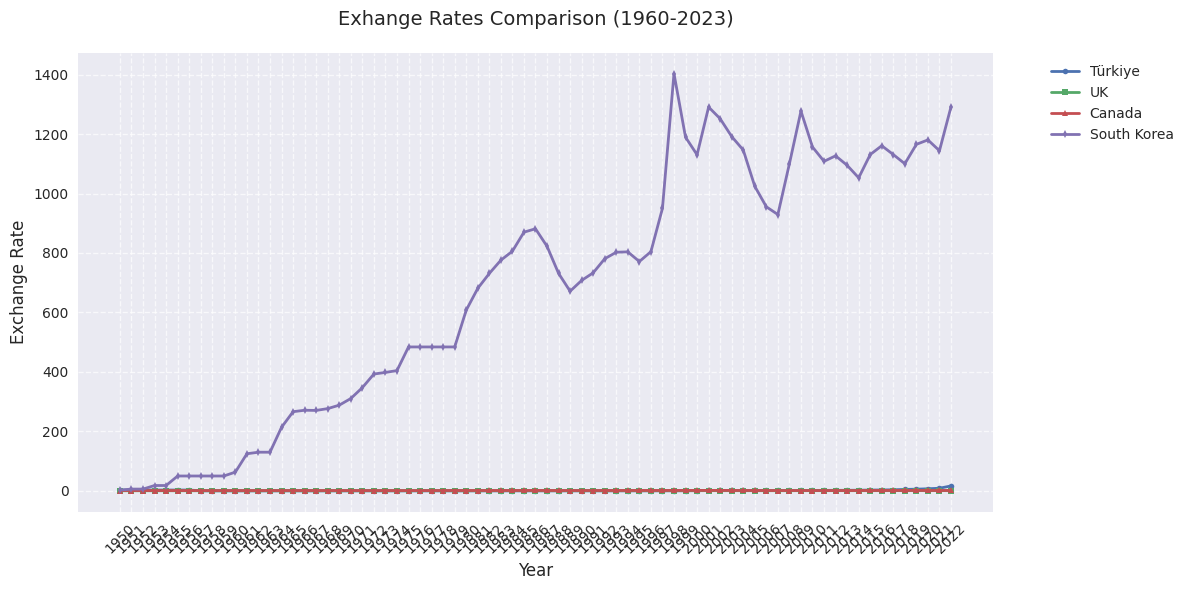

In [24]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(CurrencyPerDollar.index, CurrencyPerDollar['Türkiye'], linewidth=2, label='Türkiye', marker='o', markersize=4)
plt.plot(CurrencyPerDollar.index, CurrencyPerDollar['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(CurrencyPerDollar.index, CurrencyPerDollar['Canada'], linewidth=2, label='Canada', marker='^', markersize=4)
plt.plot(CurrencyPerDollar.index, CurrencyPerDollar['Korea'], linewidth=2, label='South Korea', marker='d', markersize=4)

# Customize the plot
plt.title('Exhange Rates Comparison (1960-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
CurrencyPerDollar.head(10)

,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
1950,0.892857,1.453166,1.239468,1.089000,0.000048,1.9600,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.239203,5.172771,4.37295,2.800000,0.357143,1.0
1951,0.892857,1.552146,1.239468,1.053000,0.000056,2.4000,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.238301,5.173210,4.37295,2.800000,0.357143,1.0
1952,0.892857,1.552146,1.239468,0.979000,0.000062,2.5100,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.238301,5.173210,4.37295,2.800000,0.357143,1.0
1953,0.892857,1.774235,1.239468,0.983000,0.000071,2.5100,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.238301,5.173210,4.37295,2.800000,0.357143,1.0
1954,0.892857,1.889494,1.239468,0.973000,0.000092,2.5100,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.234094,5.173210,4.37295,2.800000,0.357143,1.0
1955,0.892857,1.889494,1.239468,0.986000,0.000162,2.5100,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.234094,5.173210,4.37295,2.800000,0.357143,1.0
1956,0.892857,1.889494,1.239468,0.984000,0.000336,2.5100,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.234094,5.173210,4.37295,2.800000,0.357143,1.0
1957,0.892857,1.889494,1.239468,0.958844,0.000521,3.7975,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.248228,5.173210,4.37295,0.233336,0.357143,1.0
1958,0.892857,1.889494,1.239468,0.970619,0.000705,6.4000,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.252420,5.173210,4.37295,0.000005,0.357143,1.0
1959,0.892857,1.889494,1.239468,0.959114,0.000944,6.4000,5.615,NaN,6.90714,NaN,...,0.0004,0.143404,NaN,NaN,0.306514,5.173210,4.37295,0.000009,0.357143,1.0


In [26]:
# Creating a % change dataframe
CurrencyPerDollar_perc_change = CurrencyPerDollar.pct_change() * 100
CurrencyPerDollar_perc_change.head()

,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,0.0,6.811335,0.0,-3.305785,16.666667,22.448980,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,-0.377086,0.008487,0.0,0.0,0.0,0.0
1952,0.0,0.000000,0.0,-7.027540,10.714286,4.583333,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0
1953,0.0,14.308512,0.0,0.408580,14.516129,0.000000,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0
1954,0.0,6.496265,0.0,-1.017294,29.577465,0.000000,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,-1.765414,0.000000,0.0,0.0,0.0,0.0


In [27]:
#Because the OECD data website sucks, I could only download a certain amount of data at once (6000 cells), so in order to get all the countries they 
#have data on I needed to download 3 different excel sheets (used Excel sheets as they were a lot more usable than the csv formats).

IncomeTax1 = pd.read_excel(r'/work/Matts/Tax/Income tax 1.xlsx', sheet_name="Table")
IncomeTax2 = pd.read_excel(r'/work/Matts/Tax/Income tax 2.xlsx', sheet_name="Table")
IncomeTax3 = pd.read_excel(r'/work/Matts/Tax/Income tax 3.xlsx', sheet_name="Table")

#These are all the formated the same so I can repeat operations on them in a set

IncomeTax = [IncomeTax1, IncomeTax2, IncomeTax3]

In [28]:
#Removing junk rows and columns, transposing and setting correct index and columns

for df in IncomeTax:
    df.drop(df.columns[0], axis=1, inplace=True)
    df.drop(df.index[0], axis=0, inplace=True)

In [29]:
for df in IncomeTax:
        df.set_index(df.columns[0], inplace=True)

In [30]:
for df in IncomeTax:
    df.columns = df.iloc[0]  # Set column names to first row
    df.drop(df.index[0], inplace=True)  # Remove the first row

In [31]:
#Dropping more junk rows
for df in IncomeTax:
    df.drop(df.columns[0], axis=1, inplace=True)
    df.drop(df.index[0], axis=0, inplace=True)

In [32]:
#I had weirdness with transposing here... ignore this
IncomeTax1 = IncomeTax1.transpose()
IncomeTax2 = IncomeTax2.transpose()
IncomeTax3 = IncomeTax3.transpose()

IncomeTax = [IncomeTax1, IncomeTax2, IncomeTax3]

In [33]:
  #Standardising the Year (index) names to match with other dataframes as they translated weirdly
for df in IncomeTax:
    df.index = df.index.astype(int)

In [34]:
#Now I have my dataset and need to organise it until a usable way.
#I believe we could split it up into different datasets.
#This can be done with the different datasets and then the final products can be concatenated together

PersonalAllowance1 = IncomeTax1.iloc[:, 1:11]

PersonalAllowance2 = IncomeTax2.iloc[:, 1:10]

PersonalAllowance3 = IncomeTax3.iloc[:, 1:3]

PersonalAllowance = pd.concat([PersonalAllowance1, PersonalAllowance2, PersonalAllowance3], axis=1)

PersonalAllowance.sort_index(axis=1,inplace=True)

In [35]:
#Now the Process can be repeated to get a series of dataframes

MarginalRate1_1 = IncomeTax1.iloc[:, 30:47]

MarginalRate1_2 = IncomeTax2.iloc[:, 26:43]

MarginalRate1_3 = IncomeTax3.iloc[:, 7:11]

Marginalrate = pd.concat([MarginalRate1_1, MarginalRate1_2, MarginalRate1_3], axis=1)

Marginalrate.sort_index(axis=1, inplace=True)

In [36]:
Threshold1_1 = IncomeTax1.iloc[:, 48:65]

Threshold1_2 = IncomeTax2.iloc[:, 44:60]

Threshold1_3 = IncomeTax3.iloc[:, 12:16]

Threshold1 = pd.concat([Threshold1_1, Threshold1_2, Threshold1_3], axis=1)

Threshold1.sort_index(axis=1, inplace=True)

In [37]:
MarginalRate2_1 = IncomeTax1.iloc[:, 66:82]

MarginalRate2_2 = IncomeTax2.iloc[:, 61:77]

MarginalRate2_3 = IncomeTax3.iloc[:, 17:21]

Marginalrate2 = pd.concat([MarginalRate2_1, MarginalRate2_2, MarginalRate2_3], axis=1)

Marginalrate2.sort_index(axis=1, inplace=True)

In [38]:

Threshold2_1 = IncomeTax1.iloc[:, 83:100]

Threshold2_2 = IncomeTax2.iloc[:, 78:92]

Threshold2_3 = IncomeTax3.iloc[:, 22:26]

Threshold2 = pd.concat([Threshold2_1, Threshold2_2, Threshold2_3], axis=1)

Threshold2.sort_index(axis=1, inplace=True)

In [39]:
MarginalRate3_1 = IncomeTax1.iloc[:, 101:117]

MarginalRate3_2 = IncomeTax2.iloc[:, 93:107]

MarginalRate3_3 = IncomeTax3.iloc[:, 27:31]

Marginalrate3 = pd.concat([MarginalRate3_1, MarginalRate3_2, MarginalRate3_3], axis=1)

Marginalrate3.sort_index(axis=1, inplace=True)

In [40]:

Threshold3_1 = IncomeTax1.iloc[:, 118:133]

Threshold3_2 = IncomeTax2.iloc[:, 108:118]

Threshold3_3 = IncomeTax3.iloc[:, 32:35]

Threshold3 = pd.concat([Threshold3_1, Threshold3_2, Threshold3_3], axis=1)

Threshold3.sort_index(axis=1, inplace=True)

In [41]:
MarginalRate4_1 = IncomeTax1.iloc[:, 134:149]

MarginalRate4_2 = IncomeTax2.iloc[:, 119:129]

MarginalRate4_3 = IncomeTax3.iloc[:, 36:39]

Marginalrate4 = pd.concat([MarginalRate4_1, MarginalRate4_2, MarginalRate4_3], axis=1)

Marginalrate4.sort_index(axis=1, inplace=True)

In [42]:
Threshold4_1 = IncomeTax1.iloc[:, 150:164]

Threshold4_2 = IncomeTax2.iloc[:, 130:139]

Threshold4_3 = IncomeTax3.iloc[:, 40:43]

Threshold4 = pd.concat([Threshold4_1, Threshold4_2, Threshold4_3], axis=1)

Threshold4.sort_index(axis=1, inplace=True)

In [43]:
MarginalRate5_1 = IncomeTax1.iloc[:, 165:179]

MarginalRate5_2 = IncomeTax2.iloc[:, 140:149]

MarginalRate5_3 = IncomeTax3.iloc[:, 44:47]

Marginalrate5 = pd.concat([MarginalRate5_1, MarginalRate5_2, MarginalRate5_3], axis=1)

Marginalrate5.sort_index(axis=1, inplace=True)

In [44]:
#Now importing the data from 1990-1999.
# It was downloaded in a different format to the other years, as an excel spreadsheet containing a sheet for each
# year. I download each of these sheets and skip the first 5 rows of irrelevant data.

IncomeTax1990 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1990", skiprows=5)
IncomeTax1991 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1991", skiprows=5)
IncomeTax1992 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1992", skiprows=5)
IncomeTax1993 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1993", skiprows=5)
IncomeTax1994 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1994", skiprows=5)
IncomeTax1995 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1995", skiprows=5)
IncomeTax1996 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1996", skiprows=5)
IncomeTax1997 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1997", skiprows=5)
IncomeTax1998 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1998", skiprows=5)
IncomeTax1999 = pd.read_excel(r'/work/Matts/Tax/Income tax 1981-1999.xlsx', sheet_name="1999", skiprows=5)

In [45]:
IncomeTaxA = [IncomeTax1990, IncomeTax1991, IncomeTax1992, IncomeTax1993, IncomeTax1994, IncomeTax1995, 
    IncomeTax1996, IncomeTax1997, IncomeTax1998, IncomeTax1999]

In [46]:
#Performing transformation on the data to make it usable.

def clean_income_tax_df(df):
    # Fixing columns
    df.columns = df.iloc[0]
    
    # Dropping irrelevant rows
    df.drop(index=[0, 1, 2], inplace=True)
    
    # Dropping NaN rows
    df.dropna(axis=0, how="all", inplace=True)
    
    # Dropping NaN columns
    df.dropna(axis=1, how="all", inplace=True)
    
    # Renaming the country column
    df.columns = ['Country Name'] + list(df.columns[1:])
    
    # Dropping NaN labelled rows and columns
    df = df.loc[~df.index.isna(), ~df.columns.isna()]
    df = df.dropna(subset=['Country Name'])
    
    # Dropping Surtax as I am not using it
    df.drop(df.columns[2], axis=1, inplace=True)
    
    # Renaming wrongly named columns
    df.columns = list(df.columns[0:1]) + ['PersonalAllowance'] + list(df.columns[2:])
    df.columns = list(df.columns[0:2]) + ['Marginal rate'] + list(df.columns[3:])
    
    # Some NaNs are labelled differently, so replace them with NaN
    df.replace("n.a", np.nan, inplace=True)
    df.replace("n.a.", np.nan, inplace=True)
    df.replace("-", np.nan, inplace=True)
    
    return df

# Apply the function to all DataFrames in the IncomeTaxA list
for i, df in enumerate(IncomeTaxA):
    IncomeTaxA[i] = clean_income_tax_df(df)

In [47]:
# Dealing with column names repeating
def rename_duplicate_columns(df):
    column_count = {}  
    new_columns = []    

    for col in df.columns:
        if col in column_count:
            column_count[col] += 1
            new_columns.append(f"{col}{column_count[col]}")
        else:
            column_count[col] = 1
            new_columns.append(col) 

    df.columns = new_columns 

for df in IncomeTaxA:
    rename_duplicate_columns(df)

In [48]:
# Dealing with currencies being displayed differently
def reindex_and_convert_currency(df):
    # Reindexing
    df.reset_index(drop=True, inplace=True)
    
    # Converting currencies which are divided by 1000
    columns_to_operate = [col for col in df.columns if "Marginal Rate" not in col]
    for i, country in enumerate(df["Country Name"]):
        if "(´000)" in country:
            df.loc[i, columns_to_operate] *= 1000
    
    return df

# Apply the function to all DataFrames in the IncomeTaxA list
for i, df in enumerate(IncomeTaxA):
    IncomeTaxA[i] = reindex_and_convert_currency(df)

In [49]:
# Fixing Country Names
two_word_countries = ["Czech Republic ", "New Zealand", "Slovak Republic", "United Kingdom", "United States"]
def filter_country_name(country):
    country = country.replace('*', '').replace('#', '').replace(',', '')  # Remove special characters
    if country in two_word_countries:
        return country
    else:
        return country.split()[0]

for df in IncomeTaxA:
    df['Country Name'] = df['Country Name'].apply(filter_country_name)

In [50]:
# Fixing Personal Allowance column

def clean_personal_allowance(value):
    # Convert the value to a string (handles integers, floats, and None)
    value_str = str(value) if value is not None else ""
    
    # Use regex to find the numeric part of the string, including commas
    numeric_part = re.search(r'[\d,]+', value_str)
    if numeric_part:
        # Remove commas and convert to integer
        return int(numeric_part.group().replace(",", ""))

for df in IncomeTaxA:
    df['PersonalAllowance'] = df['PersonalAllowance'].apply(clean_personal_allowance)

In [51]:
# Removing spaces to match the column names with variable names
for df in IncomeTaxA:
    df.columns = [col.replace(" ", "") for col in df.columns]

In [52]:
# Transposing the column and index to merge with other dataframes

for i, df in enumerate(IncomeTaxA):
    IncomeTaxA[i] = df.set_index("CountryName").T

In [53]:
# Aligning country names with other dataframes

for df in IncomeTaxA:
    df.columns = df.columns.str.replace(r'Turkey', 'Türkiye', regex=True)
    df.columns = df.columns.str.replace(r'Czech Republic', 'Czechia', regex=True)

In [54]:
[IncomeTax1990, IncomeTax1991, IncomeTax1992, IncomeTax1993, IncomeTax1994, IncomeTax1995, 
    IncomeTax1996, IncomeTax1997, IncomeTax1998, IncomeTax1999] = IncomeTaxA

In [55]:
IncomeTaxB = [PersonalAllowance, Marginalrate, Marginalrate2, Marginalrate3, Marginalrate4, Marginalrate5, 
Threshold1, Threshold2, Threshold3, Threshold4]

In [56]:
# Now I have my List of fixed dataframes, I can concatenate them into the dataframes containing data from 2000-2018

# Combine yearly data (1990-1999) with statistic-specific data (2000-2018)
combined_dfs = {}

statistic_names=["PersonalAllowance", "Marginalrate", "Marginalrate2", "Marginalrate3", "Marginalrate4", 
    "Marginalrate5", "Threshold", "Threshold2", "Threshold3", "Threshold4"]

for i, stat_df in enumerate(IncomeTaxB):
    statistic = statistic_names[i]  # Get the corresponding statistic name
    # Extract yearly data for the current statistic
    yearly_stat_data = []
    for year, yearly_df in enumerate(IncomeTaxA, start=1990):  # Assuming IncomeTaxA is ordered from 1990-1999
        # Get the row corresponding to the current statistic
        stat_row = yearly_df.loc[statistic].to_frame().T
        stat_row.index = [year]  # Set the index to the year
        yearly_stat_data.append(stat_row)
    
    # Concatenate yearly data (1990-1999) with statistic-specific data (2000-2018)
    combined_df = pd.concat(yearly_stat_data + [stat_df])
    combined_dfs[statistic] = combined_df

In [57]:
for name, df in combined_dfs.items():
    globals()[name] = df

In [58]:
Marginalrate.head()

,Australia,Austria,Belgium,Canada,Chile,Czechia,Denmark,Estonia,Finland,France,...,Sweden,Switzerland,Türkiye,United Kingdom,United States,Latvia,Colombia,Costa Rica,Czechia,Lithuania
1990,0.0,10.0,25.0,17.0,NaN,NaN,22.0,NaN,NaN,0.0,...,3.0,0.0,NaN,25.0,15.0,NaN,NaN,NaN,NaN,NaN
1991,0.0,10.0,25.0,17.0,NaN,NaN,22.0,NaN,NaN,0.0,...,0.0,0.0,NaN,25.0,15.0,NaN,NaN,NaN,NaN,NaN
1992,0.0,10.0,25.0,17.0,NaN,NaN,22.0,NaN,NaN,0.0,...,0.0,0.0,NaN,20.0,15.0,NaN,NaN,NaN,NaN,NaN
1993,0.0,10.0,25.0,17.0,NaN,15.0,22.0,NaN,NaN,0.0,...,0.0,0.0,NaN,20.0,15.0,NaN,NaN,NaN,NaN,NaN
1994,0.0,10.0,25.0,17.0,NaN,15.0,14.5,NaN,NaN,0.0,...,0.0,0.0,NaN,20.0,15.0,NaN,NaN,NaN,NaN,NaN


In [59]:
Threshold1_perc_change = Threshold.pct_change()*100
Threshold2_perc_change = Threshold2.pct_change()*100
Threshold3_perc_change = Threshold3.pct_change()*100
Threshold4_perc_change = Threshold4.pct_change()*100
MarginalRate1_perc_change = Marginalrate.pct_change()*100
MarginalRate2_perc_change = Marginalrate2.pct_change()*100
MarginalRate3_perc_change = Marginalrate3.pct_change()*100
MarginalRate4_perc_change = Marginalrate4.pct_change()*100
MarginalRate5_perc_change = Marginalrate5.pct_change()*100
PersonalAllowance_perc_change = PersonalAllowance.pct_change()*100

In [60]:
# Now with all my statistics on tax, I can calculate tax paid by the median person, which will be done later after
# imputing data.

In [61]:
#Now we have a number of usable dataframes, including personal allowance, marginal rates and thresholds.

In [62]:
#Before using the dataframes to alter each other, we need to check that all the names of the countries match
#between the dataframes. This can be done using the index of the dataframes.

unmatched_names_1 = set(PersonalAllowance.columns) - set(CurrencyPerDollar.columns)

unmatched_names_1

{'Czechia '}

In [63]:
#This will be continued after all the dataframes I need are created, to allow standardisation on every dataframe
#at once.

In [64]:
Inflation = pd.read_csv(r'/work/Matts/Inflation/Inflation.csv')

In [65]:
#Setting Country name as the index
Inflation.set_index(Inflation.columns[0], inplace=True)

In [66]:
#Removing junk rows
Inflation.drop(Inflation.columns[0:3], axis=1, inplace=True)

In [67]:
#Moving the years to index
Inflation = Inflation.transpose()

In [68]:
#Creating a dataset which contains percentage changes in inflation in each year
Inflation_perc_change = Inflation.pct_change() * 100
Inflation_perc_change.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.119000,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.720091,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-74.022989,NaN,NaN,7.356608,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,669.691781,NaN,NaN,89.464142,NaN,NaN


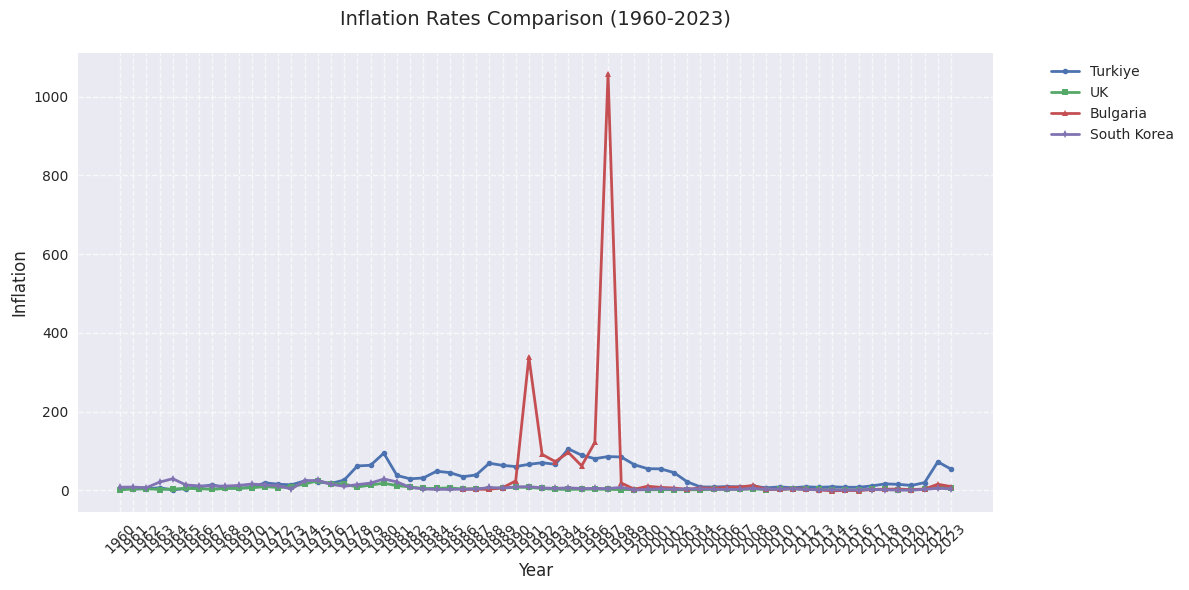

In [69]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(Inflation.index, Inflation['Turkiye'], linewidth=2, label='Turkiye', marker='o', markersize=4)
plt.plot(Inflation.index, Inflation['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(Inflation.index, Inflation['Bulgaria'], linewidth=2, label='Bulgaria', marker='^', markersize=4)
plt.plot(Inflation.index, Inflation['Korea, Rep.'], linewidth=2, label='South Korea', marker='d', markersize=4)

# Customize the plot
plt.title('Inflation Rates Comparison (1960-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
Unemployment = pd.read_csv(r'/work/Matts/Unemployment/Unemployment.csv')

In [71]:
#Setting Country name as the index
Unemployment.set_index(Unemployment.columns[0], inplace=True)

In [72]:
#Removing junk rows
Unemployment.drop(Unemployment.columns[0:3], axis=1, inplace=True)

In [73]:
#Moving the years to index
Unemployment = Unemployment.transpose()

In [74]:
#For Unemployment there is no data until 1990 so this is removed
Unemployment.drop(Unemployment.index[0:30], axis=0, inplace=True)

In [75]:
#Creating a dataset which contains percentage changes in inflation in each year
Unemployment_perc_change = Unemployment.pct_change() * 100

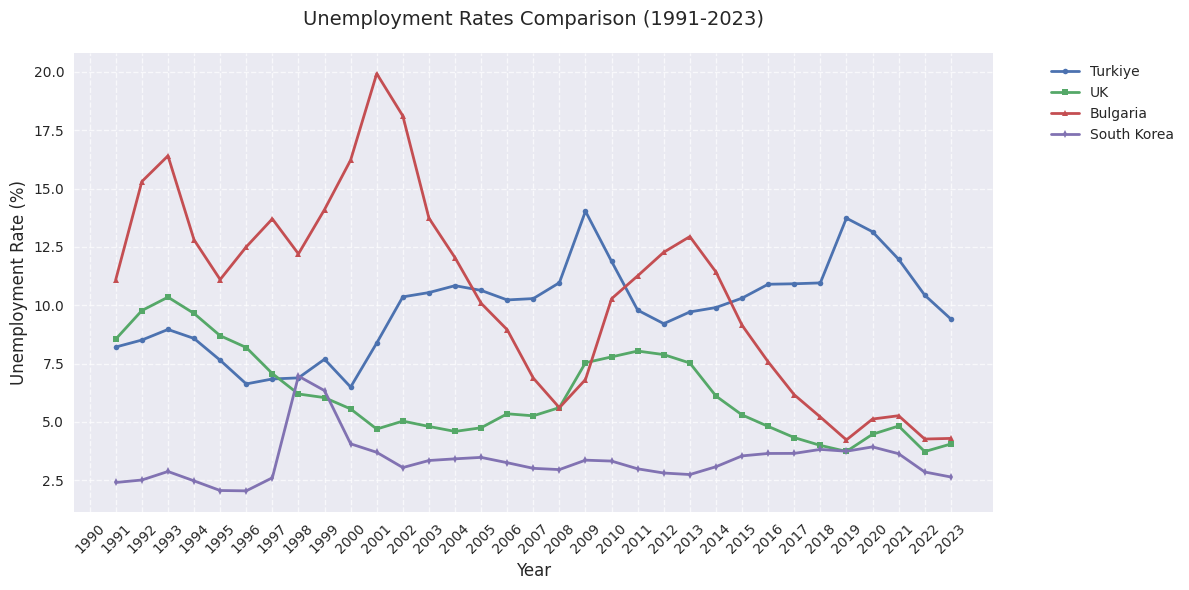

In [76]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(Unemployment.index, Unemployment['Turkiye'], linewidth=2, label='Turkiye', marker='o', markersize=4)
plt.plot(Unemployment.index, Unemployment['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(Unemployment.index, Unemployment['Bulgaria'], linewidth=2, label='Bulgaria', marker='^', markersize=4)
plt.plot(Unemployment.index, Unemployment['Korea, Rep.'], linewidth=2, label='South Korea', marker='d', markersize=4)

# Customize the plot
plt.title('Unemployment Rates Comparison (1991-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
VAT = pd.read_excel(r"/work/Matts/Tax/VAT.xlsx")

In [78]:
#Setting Country name as the index
VAT.set_index(VAT.columns[0], inplace=True)

In [79]:
#Removing Junk rows
VAT.drop(VAT.columns[20:24], axis=1, inplace=True)
VAT.drop(VAT.columns[18], axis=1, inplace=True)
VAT.drop(VAT.columns[16], axis=1, inplace=True)

In [80]:
VAT = VAT.transpose()

In [81]:
#Changing "-" into NaN values

VAT.replace({' - ': np.nan}, inplace=True)

In [82]:
#Standardising column names by removing "*" for countries to match column names with other datasets
VAT.columns = VAT.columns.str.replace(r'\*$', '', regex=True)
VAT.head()

Unnamed: 0,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,Unweighted average
2005,10.0,20.0,21.0,7.0,19.0,16.0,NaN,19.0,25.0,18.0,...,22.0,19.0,19.0,20.0,16.0,25.0,7.6,18.0,17.5,17.769444
2007,10.0,20.0,21.0,6.0,19.0,16.0,NaN,19.0,25.0,18.0,...,22.0,21.0,19.0,20.0,16.0,25.0,7.6,18.0,17.5,17.727778
2008,10.0,20.0,21.0,5.0,19.0,16.0,NaN,19.0,25.0,18.0,...,22.0,21.0,19.0,20.0,16.0,25.0,7.6,18.0,17.5,17.700000
2009,10.0,20.0,21.0,5.0,19.0,16.0,NaN,19.0,25.0,18.0,...,22.0,20.0,19.0,20.0,16.0,25.0,7.6,18.0,15.0,17.727778
2010,10.0,20.0,21.0,5.0,19.0,16.0,NaN,20.0,25.0,20.0,...,22.0,20.0,19.0,20.0,16.0,25.0,7.6,18.0,17.5,18.130556


In [83]:
#Creating a dataset which contains percentage changes in VAT in each year
VAT_perc_change = VAT.pct_change() * 100
VAT_perc_change.head()

Unnamed: 0,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czech Republic,Denmark,Estonia,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Türkiye,United Kingdom,Unweighted average
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.0,0.0,0.0,-14.285714,0.0,0.0,NaN,0.000000,0.0,0.000000,...,0.0,10.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.234485
2008,0.0,0.0,0.0,-16.666667,0.0,0.0,NaN,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.156691
2009,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.000000,...,0.0,-4.761905,0.0,0.0,0.0,0.0,0.0,0.0,-14.285714,0.156937
2010,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,5.263158,0.0,11.111111,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,16.666667,2.272015


In [84]:
for i in range(1990, 2005):
    VAT.loc[i] = [np.nan] * len(VAT.columns)

In [85]:
for i in range(1990, 2000):
    VAT_perc_change.loc[i] = [np.nan] * len(VAT_perc_change.columns)

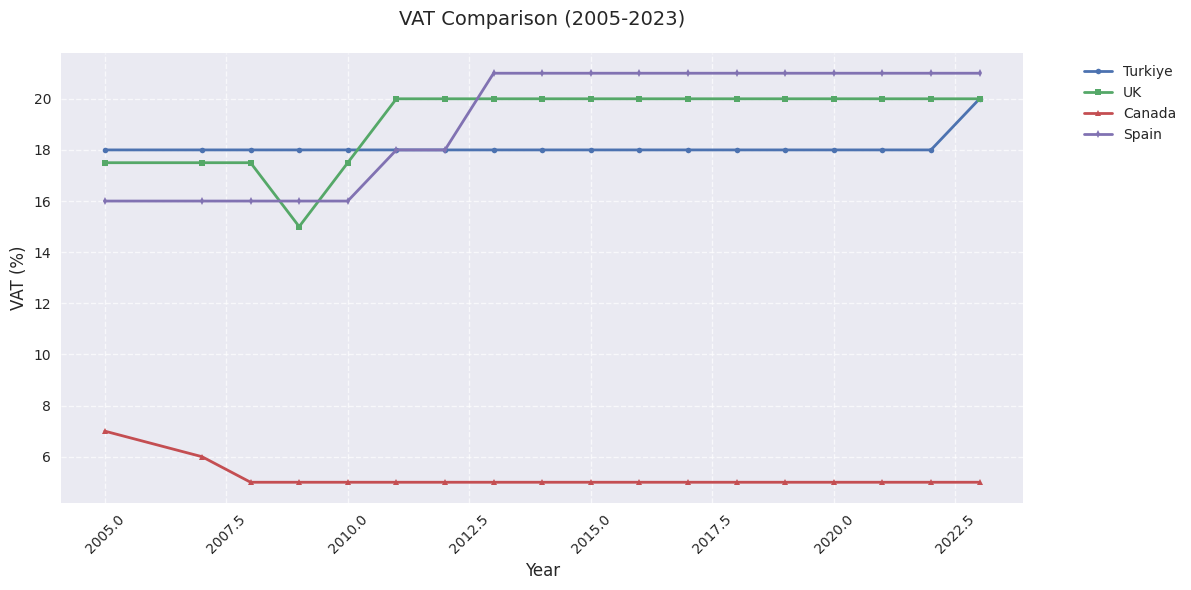

In [86]:
# Set the style for better visualization
plt.style.use('seaborn')

# Create the figure and axis with a larger size
plt.figure(figsize=(12, 6))

# Create the line plot using different line styles and colors for better distinction
plt.plot(VAT.index, VAT['Türkiye'], linewidth=2, label='Turkiye', marker='o', markersize=4)
plt.plot(VAT.index, VAT['United Kingdom'], linewidth=2, label='UK', marker='s', markersize=4)
plt.plot(VAT.index, VAT['Canada'], linewidth=2, label='Canada', marker='^', markersize=4)
plt.plot(VAT.index, VAT['Spain'], linewidth=2, label='Spain', marker='d', markersize=4)

# Customize the plot
plt.title('VAT Comparison (2005-2023)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('VAT (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
#Now to make all my dataframes into a usable format and deal with issues with NaN before concatenation.

In [88]:
AverageTaxPaid = AverageWageUSDPPP
AverageTaxPaid_perc_change = AverageWageUSDPPP

In [89]:
#Making a list of all my dataframes
Dataframes = [
    AverageTaxPaid, AverageTaxPaid_perc_change, AverageWage, AverageWageUSDPPP, AverageWageUSDPPP_perc_change,
    CorpIncomeTax, CorpIncomeTax_perc_change, CurrencyPerDollar, CurrencyPerDollar_perc_change, Inflation, 
    Inflation_perc_change, Marginalrate, MarginalRate1_perc_change, Marginalrate2, MarginalRate2_perc_change, 
    Marginalrate3, MarginalRate3_perc_change, Marginalrate4, MarginalRate4_perc_change,
    Marginalrate5, MarginalRate5_perc_change, PersonalAllowance, PersonalAllowance_perc_change, Threshold,
    Threshold1_perc_change, Threshold2, Threshold2_perc_change,
    Threshold3, Threshold3_perc_change, Threshold4, Threshold4_perc_change, Unemployment,
    Unemployment_perc_change, VAT, VAT_perc_change]

Dataframes_names =["AverageTaxPaid", "AverageTaxPaid_perc_change",
"AverageWage", "AverageWageUSDPPP","AverageWageUSDPPP_perc_change", "CorpIncomeTax", "CorpIncomeTax_perc_change","CurrencyPerDollar", "CurrencyPerDollar_perc_change", "Inflation", "Inflation_perc_change",
    "Marginalrate", "MarginalRate1_perc_change", "Marginalrate2", "MarginalRate2_perc_change", 
    "Marginalrate3", "MarginalRate3_perc_change", "Marginalrate4", "MarginalRate4_perc_change",
    "Marginalrate5", "MarginalRate5_perc_change", "PersonalAllowance", "PersonalAllowance_perc_change", "Threshold",
    "Threshold1_perc_change", "Threshold2", "Threshold2_perc_change",
    "Threshold3", "Threshold3_perc_change", "Threshold4", "Threshold4_perc_change", "Unemployment",
    "Unemployment_perc_change", "VAT", "VAT_perc_change"]



In [90]:
#Standardising country names for problem countries (named differently in different dataframes) 
# so they are the same in each Dataframe
for df in Dataframes:
    df.columns = df.columns.str.replace(r'Türkiye', 'Turkiye', regex=True)
    df.columns = df.columns.str.replace(r'Turkey', 'Turkiye', regex=True)
    df.columns = df.columns.str.replace(r'Czech Republic', 'Czechia', regex=True)
    df.columns = df.columns.str.replace(r'^Korea, Rep\.$', 'South Korea', regex=True)
    df.columns = [col if 'South Korea' in col else col.replace('Korea', 'South Korea') for col in df.columns]
    df.sort_index(axis=1, inplace=True)

In [91]:
# Removing all the Non-OECD countries from my dataframes

oecd_countries = [
    'Australia','Austria','Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 
    'Estonia', 'Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Japan',
    'Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal',
    'Slovak Republic','Slovenia','South Korea','Spain','Sweden','Switzerland','Turkiye','United Kingdom',
    'United States']

In [92]:
# Dropping Non-OECD countries

def filter_oecd_countries(df, oecd_countries):
    countries_in_df = df.columns
    invalid_columns = [country for country in countries_in_df if country not in oecd_countries]
    df.drop(columns=invalid_columns, inplace=True)

for df in Dataframes:
    filter_oecd_countries(df, oecd_countries)

In [93]:
#Dealing with NaN values

#If NaN values are above 20%, I will remove the column. If not, I will replace them using KNN interpolation.

In [94]:
# Replace inf and large values with NaN
for df in Dataframes:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
    df[df > 1e308] = np.nan  # Replace extremely large values with NaN

In [95]:
# Need to match index so putting them as the same datatype 
dfs = [AverageWage, PersonalAllowance, Threshold, Threshold2, Threshold3, Threshold4,
       Marginalrate, Marginalrate2, Marginalrate3, Marginalrate4, Marginalrate5]

for df in dfs:
    df.index = df.index.astype(int)  # Convert index to integers

#Removing 2023 as there isn't tax data for it,

AverageWage = AverageWage.iloc[:-1]

In [96]:
# Create a dictionary to store country sets for each DataFrame
dfs = {
    "AverageWage": AverageWage,
    "PersonalAllowance": PersonalAllowance,
    "Threshold1": Threshold,
    "Threshold2": Threshold2,
    "Threshold3": Threshold3,
    "Threshold4": Threshold4,
    "MarginalRate1": Marginalrate,
    "MarginalRate2": Marginalrate2,
    "MarginalRate3": Marginalrate3,
    "MarginalRate4": Marginalrate4,
    "MarginalRate5": Marginalrate5,
}

# Extract the set of country names for each DataFrame
country_sets = {name: set(df.columns) for name, df in dfs.items()}

# Find the full set of all countries across all DataFrames
all_countries = set.union(*country_sets.values())
missing_countries = {}

for name, countries in country_sets.items():
    missing_countries[name] = all_countries - countries  # Countries missing in this DataFrame

# Print missing countries for each DataFrame
for name, missing in missing_countries.items():
    if missing:
        print(f"{name} is missing: {missing}")

PersonalAllowance is missing: {'Costa Rica', 'Colombia'}
Threshold2 is missing: {'Lithuania'}
Threshold3 is missing: {'Lithuania'}
Threshold4 is missing: {'Lithuania', 'Czechia'}
MarginalRate3 is missing: {'Lithuania'}
MarginalRate4 is missing: {'Lithuania'}
MarginalRate5 is missing: {'Lithuania', 'Czechia'}


In [97]:
# Dictionary mapping DataFrames to missing countries
missing_countries = {
    "PersonalAllowance": {'Colombia', 'Costa Rica'},
    "Threshold2": {'Lithuania'},
    "Threshold3": {'Lithuania'},
    "Threshold4": {'Lithuania', 'Czechia'},
    "MarginalRate3": {'Lithuania'},
    "MarginalRate4": {'Lithuania'},
    "MarginalRate5": {'Lithuania', 'Czechia'},
}

# Dictionary of your DataFrames
dfs = {
    "PersonalAllowance": PersonalAllowance,
    "Threshold2": Threshold2,
    "Threshold3": Threshold3,
    "Threshold4": Threshold4,
    "MarginalRate3": Marginalrate3,
    "MarginalRate4": Marginalrate4,
    "MarginalRate5": Marginalrate5,
}

# Add missing columns with NaN
for name, missing_cols in missing_countries.items():
    for col in missing_cols:
        if col not in dfs[name].columns:
            dfs[name][col] = np.nan

In [98]:
# Function to prepare tax parameters with proper NaN handling
def prepare_tax_parameters(year, country):
    # Get average wage
    income = AverageWage.loc[year, country]
    
    # Handle Personal Allowance - convert NaN to 0
    personal_allowance = PersonalAllowance.loc[year, country]
    if pd.isna(personal_allowance):
        personal_allowance = 0
    
    # Handle Thresholds - replace NaN with very high number
    thresholds = []
    for threshold_df in [Threshold, Threshold2, Threshold3, Threshold4]:
        threshold_value = threshold_df.loc[year, country]
        if pd.isna(threshold_value):
            threshold_value = 1000000000  # 1 billion as an effectively "infinite" threshold
        thresholds.append(threshold_value)
    
    # Handle rates - use 0 for any NaN
    rates = []
    for rate_df in [Marginalrate, Marginalrate2, Marginalrate3, Marginalrate4, Marginalrate5]:
        rate_value = rate_df.loc[year, country]
        if pd.isna(rate_value):
            rate_value = 0
        rates.append(rate_value)
    
    return income, personal_allowance, thresholds, rates

In [99]:
# Now we have imputed, I want to create one last dataset by combining other ones.
# This dataframe will be average tax paid per person, and will be calculated using my tax dataframes and average
# wage dataframe

# Initialize a DataFrame to store tax paid by average wage earners
AverageTaxPaid = pd.DataFrame(index=AverageWage.index, columns=AverageWage.columns)

def calculate_tax(income, personal_allowance, thresholds, rates):
    # No tax below personal allowance
    taxable_income = max(income - personal_allowance, 0)
    
    # Convert rates from percentages to decimals
    decimal_rates = [rate/100 for rate in rates]
    
    # Calculate tax for each bracket
    tax = 0
    for i in range(len(thresholds)):
        if i == 0:
            lower_bound = personal_allowance
        else:
            lower_bound = thresholds[i - 1]
        upper_bound = thresholds[i]
        
        # Amount in this bracket
        bracket_income = max(0, min(taxable_income, upper_bound - lower_bound))
        tax += bracket_income * decimal_rates[i]
        
        # Reduce taxable income by the amount taxed in this bracket
        taxable_income -= bracket_income
    
    # Tax for income above the highest threshold
    if taxable_income > 0:
        tax += taxable_income * decimal_rates[-1]
    
    return tax

# Loop through each country and calculate tax
for country in AverageWage.columns:
    for year in AverageWage.index:
        # Get the average wage for this country and year
        income = AverageWage.loc[year, country]
        
        # Get tax parameters for this country and year
        personal_allowance = PersonalAllowance.loc[year, country]
        thresholds = [
            Threshold.loc[year, country],
            Threshold2.loc[year, country],
            Threshold3.loc[year, country],
            Threshold4.loc[year, country]
        ]
        rates = [
            Marginalrate.loc[year, country],
            Marginalrate2.loc[year, country],
            Marginalrate3.loc[year, country],
            Marginalrate4.loc[year, country],
            Marginalrate5.loc[year, country]
        ]
        
        # Calculate tax for this average wage earner
        tax = calculate_tax(income, personal_allowance, thresholds, rates)
        
        # Store the result
        AverageTaxPaid.loc[year, country] = tax

In [100]:
# Making a % change version of this dataset

AverageTaxPaid_perc_change = AverageTaxPaid.pct_change() * 100

In [101]:
Dataframes[0] = AverageTaxPaid
Dataframes[1] = AverageTaxPaid_perc_change

In [102]:
Dataframes = [d.reset_index(names="Year") for d in Dataframes]

In [103]:
for df in Dataframes:
    df = df.apply(pd.to_numeric, errors='coerce')

In [104]:
# Filtering code to be from 1990 onwards

# Assuming Dataframes is your list of DataFrames
for i, df in enumerate(Dataframes):
    # Check if the 'Year' column contains any string values
    if df['Year'].dtype == object:  # 'object' dtype typically indicates strings in pandas
        try:
            # Attempt to convert the 'Year' column to integers
            Dataframes[i]['Year'] = pd.to_numeric(df['Year'], errors='raise')
        except ValueError as e:
            print(f"DataFrame at index {i} has non-numeric 'Year' values that cannot be converted to integers: {e}")
            continue  # Skip this DataFrame or handle the error as needed

    # Now filter the DataFrame to keep only rows where Year >= 1990
    Dataframes[i] = df[df['Year'] >= 1990]

In [105]:
#First, removing the columns with too many NaN values

def remove_nan(df):
    for column in df.columns:
        if df[column].isnull().sum() / len(df) > 0.9:
            df.drop(column, axis=1, inplace=True)
    return df
        

for df in Dataframes:
    df = remove_nan(df)

In [106]:
#Then using KNN for the remaining Dataframes

def make_ts(df, idx):
    if df.empty:  # Check for empty DataFrame
        print(f"Skipping empty DataFrame at index {idx}")
        return df
    
    df.index = pd.to_datetime(df.index, format="%Y", errors="coerce")
    df.index = df.index.year  # Convert index to years

    # Ensure all data is numeric
    df = df.apply(pd.to_numeric, errors="coerce")

    # Replace infinite values with NaN
    if np.isinf(df.values).any():
        print(f"Replacing infinities in DataFrame at index {idx}")
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows/columns that are completely NaN (optional)
    df.dropna(axis=0, how="all", inplace=True)  # Drop full NaN rows
    df.dropna(axis=1, how="all", inplace=True)  # Drop full NaN columns

    # Check again after cleanup
    if df.empty:
        print(f"DataFrame at index {idx} became empty after cleaning, skipping.")
        return df

    # Impute missing values using KNN
    imputer = KNNImputer(n_neighbors=2)
    
    try:
        df.loc[:, :] = imputer.fit_transform(df)
    except ValueError as e:
        print(f"Imputation failed for DataFrame at index {idx}: {e}")
        return df  # Return as-is if imputation fails
    
    return df

# Apply transformation to each DataFrame and track empty ones
Dataframes = [make_ts(df, idx) for idx, df in enumerate(Dataframes)]

Replacing infinities in DataFrame at index 1


In [107]:
#Now all the names are standardised, we can do conversions using different datasets.
#We can go back to the Personal Allowance and the Threshold datasets and standardise the currencies to USD using the 
#"CurrencyPerDollar" dataset.

Need_converting = [AverageTaxPaid, PersonalAllowance, Threshold, Threshold2, Threshold3, Threshold4]

In [108]:
for df in Need_converting:
    df = df.apply(pd.to_numeric, errors='coerce')

In [109]:
def convert_to_dollars(need_converting, currency_per_dollar):
    converted_dfs = []
    
    # Debug: Print data types of input DataFrames
    print("Data Types in Need_converting:")
    for df in need_converting:
        print(df.dtypes)
    
    print("\nData Types in CurrencyPerDollar:")
    print(currency_per_dollar.dtypes)
    
    # Loop through each DataFrame in the Need_converting list
    for df in need_converting:
        # Ensure all columns in the DataFrame are numeric
        df = df.apply(pd.to_numeric, errors='coerce')
        
        # Loop through the countries (columns) in the current DataFrame
        for country in df.columns:
            # Check if the country exists in the CurrencyPerDollar columns
            if country in currency_per_dollar.columns:
                # Extract the exchange rate for that country, aligning by the index (years)
                exchange_rate = currency_per_dollar[country]
                
                # Ensure the exchange rate is numeric
                exchange_rate = pd.to_numeric(exchange_rate, errors='coerce')
                
                # Ensure the indices (years) align. Use `reindex` to align the years of the df with CurrencyPerDollar
                exchange_rate_aligned = exchange_rate.reindex(df.index, method='ffill')
                
                # Debug: Print exchange rate and aligned exchange rate
                print(f"\nCountry: {country}")
                print("DataFrame Values:")
                print(df[country])
                print("Exchange Rate Values:")
                print(exchange_rate_aligned)
                
                # Handle missing values
                df[country] = df[country].fillna(0)
                exchange_rate_aligned = exchange_rate_aligned.fillna(1)  # Avoid division by zero
                
                # Convert the values in the DataFrame to dollars (divide by exchange rate)
                df[country] = df[country] / exchange_rate_aligned
        
        # Add the converted DataFrame to the list
        converted_dfs.append(df)
    
    return converted_dfs
converted_dfs = convert_to_dollars(Need_converting, CurrencyPerDollar)

Data Types in Need_converting:
Australia          object
Austria            object
Belgium            object
Canada             object
Chile              object
Colombia           object
Costa Rica         object
Czechia            object
Denmark            object
Estonia            object
Finland            object
France             object
Germany            object
Greece             object
Hungary            object
Iceland            object
Ireland            object
Israel             object
Italy              object
Japan              object
Latvia             object
Lithuania          object
Luxembourg         object
Mexico             object
Netherlands        object
New Zealand        object
Norway             object
Poland             object
Portugal           object
Slovak Republic    object
Slovenia           object
South Korea        object
Spain              object
Sweden             object
Switzerland        object
Turkiye            object
United Kingdom     object
United 

TypeError: '<' not supported between instances of 'int' and 'str'

In [126]:
# Now I have imputed, I can convert the dtype of the index to integer and make it a column

In [ ]:
AverageTaxPaid = Dataframes[0]
AverageTaxPaid_perc_change = Dataframes[1]
AverageWage = Dataframes[2]
AverageWageUSDPPP = Dataframes[3]
AverageWageUSDPPP_perc_change = Dataframes[4]
CorpIncomeTax = Dataframes[5]
CorpIncomeTax_perc_change = Dataframes[6]
CurrencyPerDollar = Dataframes[7]
CurrencyPerDollar_perc_change = Dataframes[8]
Inflation = Dataframes[9]
Inflation_perc_change = Dataframes[10]
Marginalrate = Dataframes[11]
MarginalRate1_perc_change = Dataframes[12]
Marginalrate2 = Dataframes[13]
MarginalRate2_perc_change = Dataframes[14]
Marginalrate3 = Dataframes[15]
MarginalRate3_perc_change = Dataframes[16]
Marginalrate4 = Dataframes[17]
MarginalRate4_perc_change = Dataframes[18]
Marginalrate5 = Dataframes[19]
MarginalRate5_perc_change = Dataframes[20]
PersonalAllowance = Dataframes[21]
PersonalAllowance_perc_change = Dataframes[22]
Threshold = Dataframes[23]
Threshold1_perc_change = Dataframes[24]
Threshold2 = Dataframes[25]
Threshold2_perc_change = Dataframes[26]
Threshold3 = Dataframes[27]
Threshold3_perc_change = Dataframes[28]
Threshold4 = Dataframes[29]
Threshold4_perc_change = Dataframes[30]
Unemployment = Dataframes[31]
Unemployment_perc_change = Dataframes[32]
VAT = Dataframes[33]
VAT_perc_change = Dataframes[34]

In [110]:
#I now have my set of standardised Dataframes :)

In [111]:
# Melting the dfs to reformat them 

In [112]:
# Melt AverageTaxPaid
AverageTaxPaid_melted = pd.melt(
    AverageTaxPaid,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=AverageTaxPaid.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='AverageTaxPaid'  # Rename the value column to 'CorpIncomeTax'
)
AverageTaxPaid_melted = AverageTaxPaid_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Melt AverageTaxPaid_perc_change
AverageTaxPaid_perc_change_melted = pd.melt(
    AverageTaxPaid_perc_change,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=AverageTaxPaid_perc_change.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='AverageTaxPaid_perc_change'  # Rename the value column to 'CorpIncomeTax'
)
AverageTaxPaid_perc_change_melted = AverageTaxPaid_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Melt AverageWageUSDPPP
AverageWageUSDPPP_melted = pd.melt(
    AverageWageUSDPPP,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=AverageWageUSDPPP.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='AverageWageUSDPPP'  # Rename the value column to 'CorpIncomeTax'
)
AverageWageUSDPPP_melted = AverageWageUSDPPP_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Melt AverageWageUSDPPP_perc_chanbge
AverageWageUSDPPP_perc_change_melted = pd.melt(
    AverageWageUSDPPP_perc_change,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=AverageWageUSDPPP_perc_change.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='AverageWageUSDPPP_perc_change'  # Rename the value column to 'CorpIncomeTax'
)
AverageWageUSDPPP_perc_change_melted = AverageWageUSDPPP_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Melt CorpIncomeTax
CorpIncomeTax_melted = pd.melt(
    CorpIncomeTax,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=CorpIncomeTax.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='CorpIncomeTax'  # Rename the value column to 'CorpIncomeTax'
)
CorpIncomeTax_melted = CorpIncomeTax_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Melt CorpIncomeTax_perc_change
CorpIncomeTax_perc_change_melted = pd.melt(
    CorpIncomeTax_perc_change,
    id_vars=['Year'],  # Keep 'Year' as the identifier
    value_vars=CorpIncomeTax_perc_change.columns[1:],  # Melt all columns except 'Year'
    var_name='Country Name',  # Rename the variable column to 'Country Name'
    value_name='CorpIncomeTax_perc_change'  # Rename the value column to 'CorpIncomeTax_perc_change'
)

CorpIncomeTax_perc_change_melted = CorpIncomeTax_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# CurrencyPerDollar
CurrencyPerDollar_melted = pd.melt(CurrencyPerDollar, id_vars=['Year'], 
                                  value_vars=CurrencyPerDollar.columns[1:], 
                                  var_name='Country Name', 
                                  value_name='CurrencyPerDollar')
CurrencyPerDollar_melted = CurrencyPerDollar_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# CurrencyPerDollar_perc_change
CurrencyPerDollar_perc_change_melted = pd.melt(CurrencyPerDollar_perc_change, id_vars=['Year'], 
                                              value_vars=CurrencyPerDollar_perc_change.columns[1:], 
                                              var_name='Country Name', 
                                              value_name='CurrencyPerDollar_perc_change')
CurrencyPerDollar_perc_change_melted = CurrencyPerDollar_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Inflation
Inflation_melted = pd.melt(Inflation, id_vars=['Year'], 
                          value_vars=Inflation.columns[1:], 
                          var_name='Country Name', 
                          value_name='Inflation')
Inflation_melted = Inflation_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Inflation_perc_change
Inflation_perc_change_melted = pd.melt(Inflation_perc_change, id_vars=['Year'], 
                                      value_vars=Inflation_perc_change.columns[1:], 
                                      var_name='Country Name', 
                                      value_name='Inflation_perc_change')
Inflation_perc_change_melted = Inflation_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate1
MarginalRate1_melted = pd.melt(Marginalrate, id_vars=['Year'], 
                              value_vars=Marginalrate.columns[1:], 
                              var_name='Country Name', 
                              value_name='Marginalrate')
MarginalRate1_melted = MarginalRate1_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate1_perc_change
MarginalRate1_perc_change_melted = pd.melt(MarginalRate1_perc_change, id_vars=['Year'], 
                                          value_vars=MarginalRate1_perc_change.columns[1:], 
                                          var_name='Country Name', 
                                          value_name='MarginalRate1_perc_change')
MarginalRate1_perc_change_melted = MarginalRate1_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate2
MarginalRate2_melted = pd.melt(Marginalrate2, id_vars=['Year'], 
                              value_vars=Marginalrate2.columns[1:], 
                              var_name='Country Name', 
                              value_name='Marginalrate2')
MarginalRate2_melted = MarginalRate2_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate2_perc_change
MarginalRate2_perc_change_melted = pd.melt(MarginalRate2_perc_change, id_vars=['Year'], 
                                          value_vars=MarginalRate2_perc_change.columns[1:], 
                                          var_name='Country Name', 
                                          value_name='MarginalRate2_perc_change')
MarginalRate2_perc_change_melted = MarginalRate2_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate3
MarginalRate3_melted = pd.melt(Marginalrate3, id_vars=['Year'], 
                              value_vars=Marginalrate3.columns[1:], 
                              var_name='Country Name', 
                              value_name='Marginalrate3')
MarginalRate3_melted = MarginalRate3_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate3_perc_change
MarginalRate3_perc_change_melted = pd.melt(MarginalRate3_perc_change, id_vars=['Year'], 
                                          value_vars=MarginalRate3_perc_change.columns[1:], 
                                          var_name='Country Name', 
                                          value_name='MarginalRate3_perc_change')
MarginalRate3_perc_change_melted = MarginalRate3_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate4
MarginalRate4_melted = pd.melt(Marginalrate4, id_vars=['Year'], 
                              value_vars=Marginalrate4.columns[1:], 
                              var_name='Country Name', 
                              value_name='Marginalrate4')
MarginalRate4_melted = MarginalRate4_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate4_perc_change
MarginalRate4_perc_change_melted = pd.melt(MarginalRate4_perc_change, id_vars=['Year'], 
                                          value_vars=MarginalRate4_perc_change.columns[1:], 
                                          var_name='Country Name', 
                                          value_name='MarginalRate4_perc_change')
MarginalRate4_perc_change_melted = MarginalRate4_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate5
MarginalRate5_melted = pd.melt(Marginalrate5, id_vars=['Year'], 
                              value_vars=Marginalrate5.columns[1:], 
                              var_name='Country Name', 
                              value_name='Marginalrate5')
MarginalRate5_melted = MarginalRate5_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# MarginalRate5_perc_change
MarginalRate5_perc_change_melted = pd.melt(MarginalRate5_perc_change, id_vars=['Year'], 
                              value_vars=MarginalRate5_perc_change.columns[1:], 
                              var_name='Country Name', 
                              value_name='MarginalRate5_perc_change')
MarginalRate5_perc_change_melted = MarginalRate5_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# PersonalAllowance
PersonalAllowance_melted = pd.melt(PersonalAllowance, id_vars=['Year'], 
                                  value_vars=PersonalAllowance.columns[1:], 
                                  var_name='Country Name', 
                                  value_name='PersonalAllowance')
PersonalAllowance_melted = PersonalAllowance_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# PersonalAllowance_perc_change
PersonalAllowance_perc_change_melted = pd.melt(PersonalAllowance_perc_change, id_vars=['Year'], 
                                              value_vars=PersonalAllowance_perc_change.columns[1:], 
                                              var_name='Country Name', 
                                              value_name='PersonalAllowance_perc_change')
PersonalAllowance_perc_change_melted = PersonalAllowance_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold1
Threshold1_melted = pd.melt(Threshold, id_vars=['Year'], 
                           value_vars=Threshold.columns[1:], 
                           var_name='Country Name', 
                           value_name='Threshold')
Threshold1_melted = Threshold1_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold1_perc_change
Threshold1_perc_change_melted = pd.melt(Threshold1_perc_change, id_vars=['Year'], 
                                       value_vars=Threshold1_perc_change.columns[1:], 
                                       var_name='Country Name', 
                                       value_name='Threshold1_perc_change')
Threshold1_perc_change_melted = Threshold1_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold2
Threshold2_melted = pd.melt(Threshold2, id_vars=['Year'], 
                           value_vars=Threshold2.columns[1:], 
                           var_name='Country Name', 
                           value_name='Threshold2')
Threshold2_melted = Threshold2_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold2_perc_change
Threshold2_perc_change_melted = pd.melt(Threshold2_perc_change, id_vars=['Year'], 
                                       value_vars=Threshold2_perc_change.columns[1:], 
                                       var_name='Country Name', 
                                       value_name='Threshold2_perc_change')
Threshold2_perc_change_melted = Threshold2_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold3
Threshold3_melted = pd.melt(Threshold3, id_vars=['Year'], 
                           value_vars=Threshold3.columns[1:], 
                           var_name='Country Name', 
                           value_name='Threshold3')
Threshold3_melted = Threshold3_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold3_perc_change
Threshold3_perc_change_melted = pd.melt(Threshold3_perc_change, id_vars=['Year'], 
                                       value_vars=Threshold3_perc_change.columns[1:], 
                                       var_name='Country Name', 
                                       value_name='Threshold3_perc_change')
Threshold3_perc_change_melted = Threshold3_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold4
Threshold4_melted = pd.melt(Threshold4, id_vars=['Year'], 
                           value_vars=Threshold4.columns[1:], 
                           var_name='Country Name', 
                           value_name='Threshold4')
Threshold4_melted = Threshold4_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Threshold4_perc_change
Threshold4_perc_change_melted = pd.melt(Threshold4_perc_change, id_vars=['Year'], 
                                       value_vars=Threshold4_perc_change.columns[1:], 
                                       var_name='Country Name', 
                                       value_name='Threshold4_perc_change')
Threshold4_perc_change_melted = Threshold4_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Unemployment
Unemployment_melted = pd.melt(Unemployment, id_vars=['Year'], 
                             value_vars=Unemployment.columns[1:], 
                             var_name='Country Name', 
                             value_name='Unemployment')
Unemployment_melted = Unemployment_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# Unemployment_perc_change
Unemployment_perc_change_melted = pd.melt(Unemployment_perc_change, id_vars=['Year'], 
                                         value_vars=Unemployment_perc_change.columns[1:], 
                                         var_name='Country Name', 
                                         value_name='Unemployment_perc_change')
Unemployment_perc_change_melted = Unemployment_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# VAT
VAT_melted = pd.melt(VAT, id_vars=['Year'], 
                     value_vars=VAT.columns[1:], 
                     var_name='Country Name', 
                     value_name='VAT')
VAT_melted = VAT_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

# VAT_perc_change
VAT_perc_change_melted = pd.melt(VAT_perc_change, id_vars=['Year'], 
                                value_vars=VAT_perc_change.columns[1:], 
                                var_name='Country Name', 
                                value_name='VAT_perc_change')
VAT_perc_change_melted = VAT_perc_change_melted.sort_values(by=['Year', 'Country Name']).reset_index(drop=True)

In [113]:
Melted_Dataframes = [AverageTaxPaid_melted, AverageTaxPaid_perc_change_melted, AverageWageUSDPPP_melted,  
AverageWageUSDPPP_perc_change_melted, CurrencyPerDollar_melted,CurrencyPerDollar_perc_change_melted,
Inflation_melted,Inflation_perc_change_melted,MarginalRate1_melted,MarginalRate1_perc_change_melted,
    MarginalRate2_melted,MarginalRate2_perc_change_melted,MarginalRate3_melted, MarginalRate3_perc_change_melted,
    MarginalRate4_melted,MarginalRate4_perc_change_melted,MarginalRate5_melted, MarginalRate5_perc_change_melted,
    PersonalAllowance_melted,PersonalAllowance_perc_change_melted,Threshold1_melted,
    Threshold1_perc_change_melted,Threshold2_melted,Threshold2_perc_change_melted,Threshold3_melted,
    Threshold3_perc_change_melted,Threshold4_melted,Threshold4_perc_change_melted,Unemployment_melted,
    Unemployment_perc_change_melted,VAT_melted,VAT_perc_change_melted
]

In [114]:
# Merge all DataFrames iteratively
Matt = Melted_Dataframes[0]  # Start with the first DataFrame
Matt = AverageTaxPaid_melted
for df in Melted_Dataframes[1:]:
    Matt = pd.merge(Matt, df, on=['Year', 'Country Name'], how='outer')  # Adjust 'on' and 'how' as needed
Matt

,Year,Country Name,AverageTaxPaid,AverageTaxPaid_perc_change,AverageWageUSDPPP,AverageW,CurrencyPerDollar,CurrencyPerDollar_perc_change,Inflation,Inflation_perc_change,...,Threshold2,Threshold2_perc_change,Threshold3,Threshold3_perc_change,Threshold4,Threshold4_perc_change,Unemployment,Unemployment_perc_change,VAT,VAT_perc_change
0,1990,Australia,0.0000,NaN,NaN,NaN,1.281057,1.301600,7.333022,-2.666355,...,17650.0,NaN,20600.0,NaN,20700.0,NaN,NaN,NaN,NaN,NaN
1,1990,Austria,1546.1885,NaN,NaN,NaN,0.826278,-14.064544,3.261872,27.002725,...,150000.0,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990,Belgium,0.0000,NaN,NaN,NaN,0.828409,-15.191544,3.448312,10.983456,...,314000.0,NaN,449000.0,NaN,1031000.0,NaN,NaN,NaN,NaN,NaN
3,1990,France,0.0000,NaN,NaN,NaN,0.830127,-14.652710,3.194283,-8.690468,...,2890.0,NaN,3426.0,NaN,5415.0,NaN,NaN,NaN,NaN,NaN
4,1990,Greece,0.0000,NaN,NaN,NaN,0.465191,-2.402842,20.433499,49.634972,...,910000.0,NaN,1430000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1995,Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.150,-13.228155,NaN,NaN
1284,1996,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.852,-5.657605,NaN,NaN
1285,1996,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.915,2.650378,NaN,NaN
1286,1996,Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.400,-6.499430,NaN,NaN


In [115]:
Matt.isna().sum()

Year                                0
Country Name                        0
AverageTaxPaid                    925
AverageTaxPaid_perc_change       1230
AverageWageUSDPPP                 289
AverageW                          326
CurrencyPerDollar                 265
CurrencyPerDollar_perc_change     265
Inflation                         234
Inflation_perc_change             234
Marginalrate                      529
MarginalRate1_perc_change         776
Marginalrate2                     661
MarginalRate2_perc_change         552
Marginalrate3                     793
MarginalRate3_perc_change         616
Marginalrate4                     793
MarginalRate4_perc_change         712
Marginalrate5                    1024
MarginalRate5_perc_change         872
PersonalAllowance                 991
PersonalAllowance_perc_change     712
Threshold                         628
Threshold1_perc_change            552
Threshold2                        760
Threshold2_perc_change            616
Threshold3  

In [116]:
Matt.to_csv('Matt.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63ad4e1b-19bb-4dd7-a997-1fa3d2fd82a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>